# Restaurant DataFrame

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Restaurant DataFrame
rest_df= pd.read_csv("../data/batch1_restaurants_dataset.csv")
rest_df = rest_df.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

cats_to_remove = ['Advertising agency', 'Art museum', 'Art studio', 'Association / Organization', 'Beauty salon',
                  'Bicycle club', 'Branding agency', 'Business management consultant', 'Candle store', 'Car dealer', 'Car wash', 'Caterer',
                  'Catering food and drink supplier', "Children's clothing store", 'Chinese Takeaway', 'Chinese language school', 'Clothing store',
                  'Coaching center', 'Coffee store', 'Condominium complex', 'Consultant', 'Corporate office', 'Curtain and upholstery cleaning service',
                  'Dance school', 'Delivery Restaurant', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center',
                  'Event management company', 'Fish store', 'Food producer', 'Food products supplier', 'Freight forwarding service', 'Fruit wholesaler'
                  'Gift shop', 'Gourmet grocery store', 'Gym and Fitness Centre', 'Hawker Stall', 'Hawker center', 'Health and beauty shop',
                  'Health food store', 'Holding company', 'Hotel', 'Housing development', 'Importer', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
                  'Information services', 'Interior designer', 'Italian grocery store', 'Japanese confectionery shop', 'Jewelry store', 'Lodging',
                  'Marketing agency', 'Marketing consultant', 'Maternity store', 'Motorcycle rental agency', 'Movie rental store', 'Music producer',
                  'Pastry shop', 'Performing arts group', 'Pet Shop', 'Photography service', 'Property management company', 'Publisher', 'Real estate consultant',
                  'Recording studio', 'Religious organization', 'Restaurant supply store', 'Serviced accommodation', 'Takeaways', 'Tattoo and piercing shop',
                  'Tattoo shop', 'Tea store', 'Used clothing store', 'Video production service', 'Wellness center', 'Wellness program', 'Wine cellar', "Women's clothing store"]

cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = rest_df['main_category'].str.lower().isin(cats_to_remove)
rest_df = rest_df[~mask]


In [3]:
# Scan for duplicates
#rest_df.isnull().sum()

In [4]:
rest_df['main_category'] = rest_df['main_category'].fillna('Unknown')
rest_df['categories'] = rest_df['categories'].fillna("['Unknown']")
rest_df['address'] = rest_df['address'].fillna('Singapore')

In [5]:
# Scan for total nan value
#rest_df.isna().sum()

In [6]:
# Basic statistics for int/float columns
#rest_df.describe()

In [7]:
# Data Types of each column
#rest_df.info()

In [8]:
# Unique numbers for each column
#rest_df.nunique()

In [9]:
# Scan for exact duplicates
#rest_df.duplicated().sum()

In [10]:
# Show duplicated rows if present
#duplicated_rows = rest_df[rest_df.duplicated(keep=False)]

In [11]:
unique_rest_df = rest_df.drop_duplicates()

In [12]:
unique_rest_df.shape

(1007, 9)

In [13]:
unique_rest_df = unique_rest_df.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

# Reviews DataFrame

In [14]:
# Review DataFrame
review_df = pd.read_csv("../data/batch1_reviews_dataset.csv")

In [15]:
review_df[pd.notna(review_df['response_from_owner_translated_text'])].head()

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
6422,ChIJWc2IXPcZ2jERmlD8RvrUNRc,Pratunam PLUS by Soi Thai Soi Nice - Bugis+,ChdDSUhNMG9nS0VJQ0FnSURtbXRhemtnRRAB,1,"Food so bad,n service also ***This person want...",2 years ago,2022-08-29 00:17:40.880365,2,"Dear Evonne, We are truly sorry for the unplea...",2 years ago,2022-08-29 00:17:40.880365,6.0,5.0,False,"Food so bad,n service also ***this person want...","Dear Evonne, We are truly sorry for the unplea..."
6890,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChZDSUhNMG9nS0VJQ0FnSUN4LTdEVFh3EAE,5,"If anyone wants to eat delicious Thai food, I ...",a year ago,2023-08-29 00:17:47.773747,1,Thank you so much :),a year ago,2023-08-29 00:17:47.773747,5.0,6.0,False,Food,Thank you so much na ka :)
6944,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChdDSUhNMG9nS0VJQ0FnSURXOE5lWi1nRRAB,5,One of my favourite Thai food restaurant.,a year ago,2023-08-29 00:17:50.598106,0,Thank you so much :),a year ago,2023-08-29 00:17:50.598106,28.0,119.0,True,NaN,Thank you so much na ka :)
7028,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChZDSUhNMG9nS0VJQ0FnSURLeFlQNVB3EAE,5,Wonderful authentic Thai boat noodles.,3 years ago,2021-08-29 00:17:54.068164,0,Thank you so much,3 years ago,2021-08-29 00:17:54.068164,23.0,26.0,True,NaN,Thank you na kaaa
7030,ChIJ1wVQuBIZ2jERq6BkeMen-LA,Thachang @ Telok Ayer,ChdDSUhNMG9nS0VJQ0FnSUNLeThlZXJRRRAB,5,Very nice location to eat tasty thai food in a...,3 years ago,2021-08-29 00:17:54.072781,0,Thank you so much,3 years ago,2021-08-29 00:17:54.072781,19.0,28.0,True,NaN,Thank you na kaaa


In [17]:
# Show columns and rows
#review_df.shape

(563796, 16)

In [16]:
# Show total duplicated row
review_df.duplicated().sum()

0

In [17]:
# Show column names
review_df.columns

Index(['place_id', 'name', 'review_id', 'rating', 'review_text',
       'published_at', 'published_at_date', 'review_likes_count',
       'response_from_owner_text', 'response_from_owner_ago',
       'response_from_owner_date', 'total_number_of_reviews_by_reviewer',
       'total_number_of_photos_by_reviewer', 'is_local_guide',
       'review_translated_text', 'response_from_owner_translated_text'],
      dtype='object')

In [18]:
drop_review_df = review_df.drop(columns=['published_at','review_likes_count','review_translated_text', 'response_from_owner_translated_text',])

In [19]:
# Create a new feature 'Review Text Length' to show the word count of each review
# Function to count words
def count_words(text):
    if pd.isna(text):  # Handle NaN values
        return 0
    return len(text.split())

# Apply function to create new column
drop_review_df['Review Text Length'] = drop_review_df['review_text'].apply(count_words)

In [20]:
# Create a new feature 'Days_since_published' to show the num of days since the last review was published
# Convert the 'published_at_date' column to datetime
drop_review_df['published_at_date'] = pd.to_datetime(drop_review_df['published_at_date'])

# Get the current date
current_date = pd.Timestamp(datetime.now())

# Calculate the number of days since each date
drop_review_df['days_since_published'] = (current_date - d rop_review_df['published_at_date']).dt.days

# Drop rows with no review
drop_review_df = drop_review_df.dropna(subset=['days_since_published'])

# Covert the values from float to int
drop_review_df['days_since_published'] = drop_review_df['days_since_published'].astype(int)

In [21]:
# Create a new feature 'owner_responded' by converting drop_review_df['response_from_owner_text'] to binary
drop_review_df['owner_responded'] = drop_review_df['response_from_owner_text'].notna().astype(int)

In [22]:
# Convert 'is_local_guide' from True/False to Binary
drop_review_df['is_local_guide'] = drop_review_df['is_local_guide'].fillna(0).astype(int)

# Restaurant & Reviews DataFrame

In [24]:
rest_review_df = pd.merge(left=unique_rest_df ,right=drop_review_df,on='place_id',how='left')
rest_review_df.head()

,place_id,name_x,reviews,main_category,categories,main_rating,address,link,review_photos,name_y,...,published_at_date,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,Review Text Length,days_since_published,owner_responded
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-08-07 16:56:41.667109,NaN,NaN,NaN,8.0,103.0,1.0,23.0,22.0,0.0
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-06-28 16:56:41.669325,NaN,NaN,NaN,10.0,NaN,1.0,0.0,62.0,0.0
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-05-28 16:56:41.670805,NaN,NaN,NaN,196.0,1583.0,1.0,6.0,93.0,0.0
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-05-28 16:56:41.673009,NaN,NaN,NaN,11.0,1.0,0.0,115.0,93.0,0.0
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,(Fu Chan) Harummanis Muslim Food,...,2024-03-28 16:56:41.674813,NaN,NaN,NaN,6.0,NaN,1.0,10.0,154.0,0.0


In [66]:
rest_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541815 entries, 0 to 541814
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   place_id                             541815 non-null  object        
 1   name_x                               541815 non-null  object        
 2   reviews                              541815 non-null  int64         
 3   main_category                        541815 non-null  object        
 4   categories                           541815 non-null  object        
 5   main_rating                          541815 non-null  float64       
 6   address                              541815 non-null  object        
 7   link                                 541815 non-null  object        
 8   review_photos                        541815 non-null  object        
 9   name_y                               541760 non-null  object        
 

/tmp/ipykernel_65651/2550713885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = rest_review_df.corr()


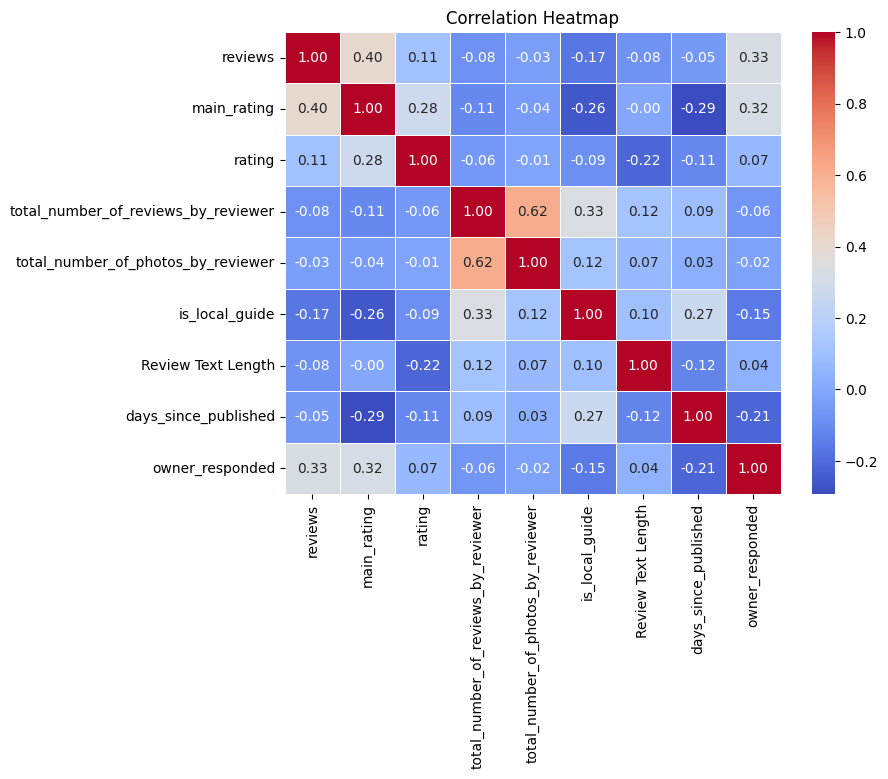

In [27]:
correlations = rest_review_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Main Rating is correlated with Reviews, Owner_responded, Rating

/tmp/ipykernel_68047/1706758593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_68047/1706758593.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


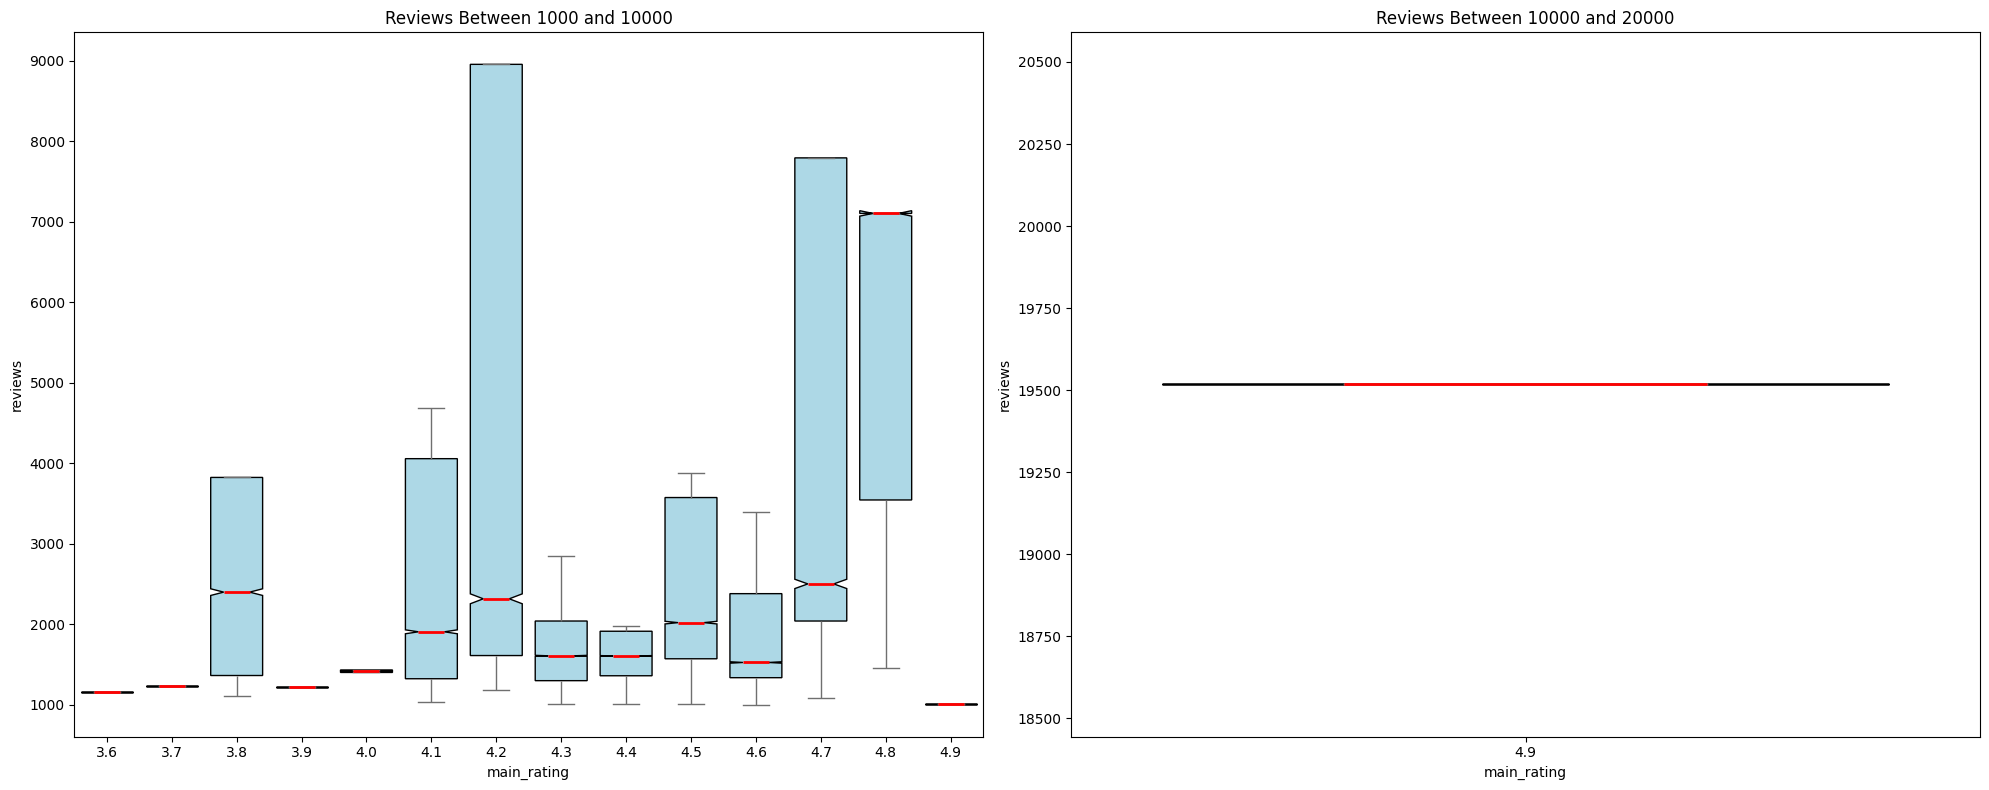

In [31]:
# Create a figure with two subplots
plt.figure(figsize=(20, 8))

# First subplot: Reviews between 1000 and 10000
plt.subplot(1, 2, 1)
sns.boxplot(
    x='main_rating',
    y='reviews',
    data=rest_review_df[(rest_review_df['reviews'] > 1000) & (rest_review_df['reviews'] <= 10000)],
    palette='pastel',
    showfliers=False,
    notch=True,
    medianprops={'color': 'red', 'linewidth': 2},
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'}
)
plt.title('Reviews Between 1000 and 10000')

# Second subplot: Reviews between 10000 and 20000
plt.subplot(1, 2, 2)
sns.boxplot(
    x='main_rating',
    y='reviews',
    data=rest_review_df[(rest_review_df['reviews'] > 10000) & (rest_review_df['reviews'] < 20000)],
    palette='pastel',
    showfliers=False,
    notch=True,
    medianprops={'color': 'red', 'linewidth': 2},
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'}
)
plt.title('Reviews Between 10000 and 20000')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_68047/787123573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


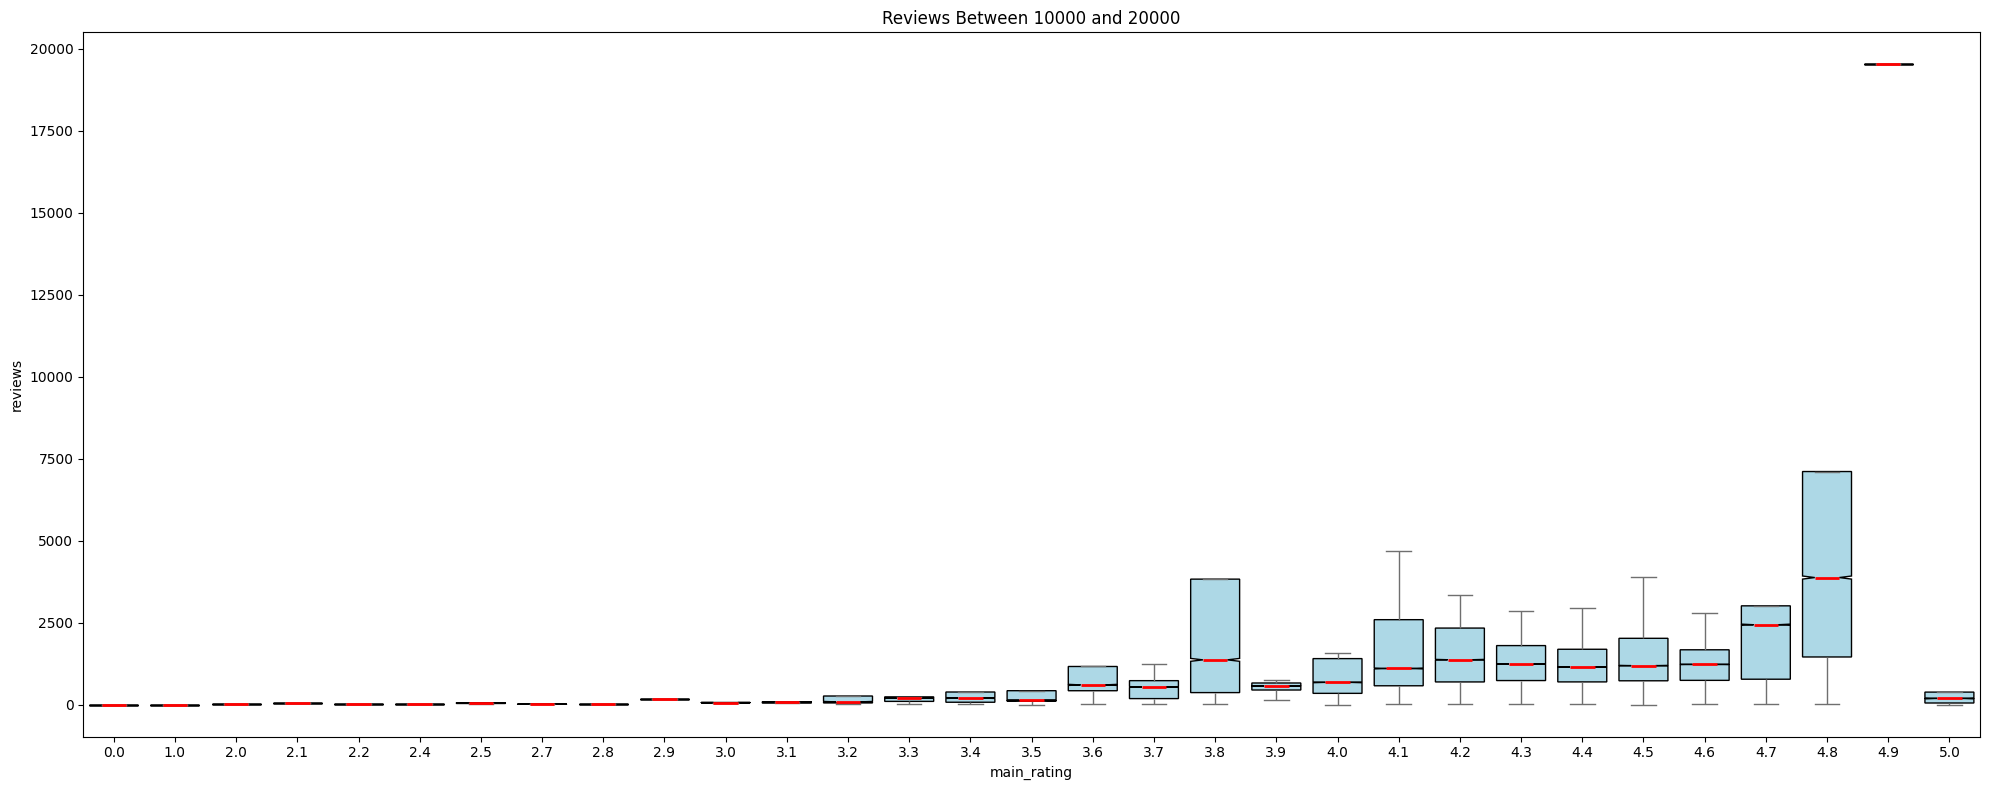

In [35]:
plt.figure(figsize=(20, 8))
sns.boxplot(
    x='main_rating',
    y='reviews',
    data=rest_review_df,
    palette='pastel',
    showfliers=False,
    notch=True,
    medianprops={'color': 'red', 'linewidth': 2},
    boxprops={'facecolor': 'lightblue', 'edgecolor': 'black'}
)
plt.title('Reviews Between 10000 and 20000')

# Adjust layout
plt.tight_layout()
plt.show()

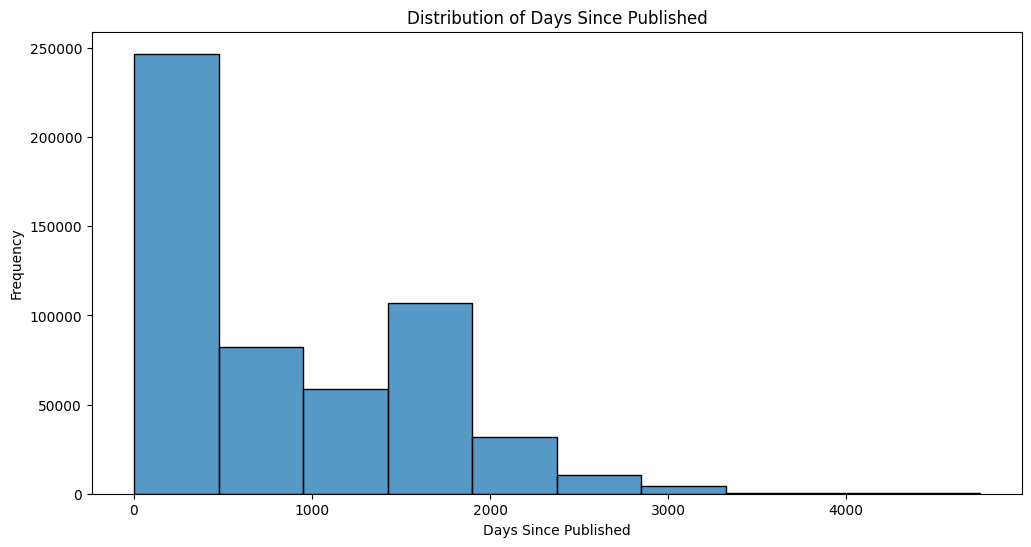

In [82]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=rest_review_df,
    x='days_since_published',
    # kde=True,  # Kernel Density Estimate for smoothing
    # color='skyblue',
    bins=10  # Number of bins for the histogram
)

plt.title('Distribution of Days Since Published')
plt.xlabel('Days Since Published')
plt.ylabel('Frequency')

plt.show()

<Axes: xlabel='days_since_published', ylabel='Count'>

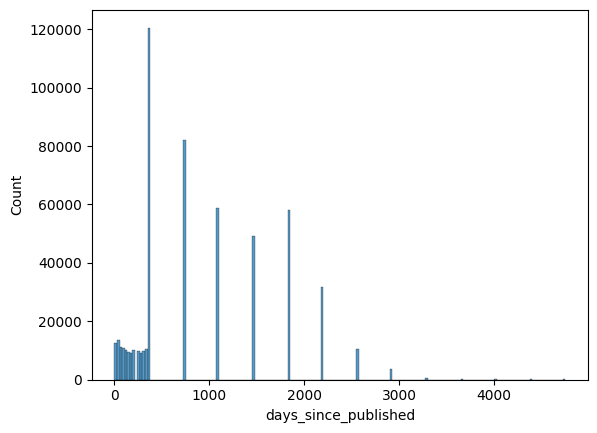

In [81]:
sns.histplot(rest_review_df['days_since_published'])

In [86]:
old_reviews = rest_review_df[rest_review_df['days_since_published'] == 4750]
old_reviews['name_x'].unique()

array(['928 Ngee Fou (Hakka) Ampang Yong Tou Fou', "Ah Hoi's Kitchen",
       'Ah Orh Seafood Restaurant', 'Ah Yat Seafood Restaurant', 'Akashi',
       'Al-Azhar Restaurant',
       'Alaturka Mediterranean & Turkish Restaurant',
       "Amirah's Grill Restaurant & Cafe", 'Ananda Bhavan Vegetarian',
       'Asia Grand Restaurant', 'Ayam Penyet President - Lucky Plaza',
       'Basilico', 'SUN with MOON Japanese Dining & Cafe', 'SUSHI TEI',
       'Bistro Du Vin', 'Boon Tong Kee @ River Valley',
       'Brasserie Gavroche', 'Brazil Churrasco',
       'Brewerkz Riverside Point', 'Brotzeit @ Raffles City',
       'Brotzeit German Beer Bar and Restaurant - VivoCity',
       'Folks Collective', 'Café Iguana Riverside Point',
       'StraitsKitchen', 'Singapore Zam Zam Restaurant',
       'Evertop Hainanese Boneless Chicken Rice Pte Ltd',
       'Cumi Bali Indonesian Restaurant'], dtype=object)

In [94]:
rest_review_df[rest_review_df['name_x'] == "Ah Hoi's Kitchen"]['days_since_published'].min()

367.0

In [ ]:
# Create a new feature 'owner_responded' by converting drop_review_df['response_from_owner_text'] to binary
drop_review_df['owner_responded'] = drop_review_df['response_from_owner_text'].notna().astype(int)

In [75]:
rest_review_df.groupby('name_x').agg({'days_since_published': 'count'})

,days_since_published
name_x,
#01-22 Wufu Hakka Noodle,1
(Fu Chan) Harummanis Muslim Food,35
(Viet Taste) Vietnamese Cuisine @ Food Junction Great World City,265
116 PHỐ ĐÊM,3
123 ZÔ - Ẩm Thực Việt,252
...,...
Ăn Là Ghiền-Authentic Vietnamese Cuisine,1749
Ăn Là Ghiền-Cơm Niêu,194
Ăn Là Ghiền-Lẩu Nướng,259


In [98]:
rest_review_df.columns

Index(['place_id', 'name_x', 'reviews', 'main_category', 'categories',
       'main_rating', 'address', 'link', 'review_photos', 'name_y',
       'review_id', 'rating', 'review_text', 'published_at_date',
       'response_from_owner_text', 'response_from_owner_ago',
       'response_from_owner_date', 'total_number_of_reviews_by_reviewer',
       'total_number_of_photos_by_reviewer', 'is_local_guide',
       'Review Text Length', 'days_since_published', 'owner_responded'],
      dtype='object')

In [149]:
resturant_review_df = rest_review_df[['place_id', 'name_x', 'reviews', 'main_category', 'categories',
       'main_rating', 'address', 'rating', 'review_text',
        'is_local_guide','Review Text Length', 'days_since_published', 'owner_responded', 'published_at_date']].rename(columns= {'name_x':'name'})
resturant_review_df = resturant_review_df.dropna(subset=['published_at_date'])
resturant_review_df['published_at_year'] = resturant_review_df['published_at_date'].dt.year.astype('int64')
resturant_review_df[:5]

,place_id,name,reviews,main_category,categories,main_rating,address,rating,review_text,is_local_guide,Review Text Length,days_since_published,owner_responded,published_at_date,published_at_year
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",5.0,Deserve a Michelin recognize food was memorizi...,1.0,23.0,22.0,0.0,2024-08-07 16:56:41.667109,2024
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",1.0,NaN,1.0,0.0,62.0,0.0,2024-06-28 16:56:41.669325,2024
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",3.0,Ok. Decent food. A little ex.,1.0,6.0,93.0,0.0,2024-05-28 16:56:41.670805,2024
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",5.0,Here to celebrate my birthday. The food is so ...,0.0,115.0,93.0,0.0,2024-05-28 16:56:41.673009,2024
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",1.0,This is not the first time I have missing food.,1.0,10.0,154.0,0.0,2024-03-28 16:56:41.674813,2024


In [187]:
# resturant_review_histo_df = resturant_review_df[resturant_review_df['name'] == resturant_review_df['name'].unique()]
# resturant_review_df['name'].value_counts()
resturant_review_df.groupby('published_at_year')['reviews'].sum().reset_index()

,published_at_year,reviews
0,2011,80858
1,2012,201885
2,2013,364245
3,2014,409634
4,2015,842331
5,2016,6373316
6,2017,21213284
7,2018,67354600
8,2019,111213083
9,2020,88778742


In [179]:
resturant_review_df.shape

(541760, 15)

In [186]:
filter = []
for i in range(2012,2025):
    filtered_df = resturant_review_df[(resturant_review_df['published_at_year'] == i) & (resturant_review_df['reviews'] <= 1000)]
    count_2012 = filtered_df.shape[0]
    filter.append(count_2012)
filter

[25, 62, 66, 190, 1405, 4090, 11331, 23055, 20587, 26173, 35144, 67569, 42254]

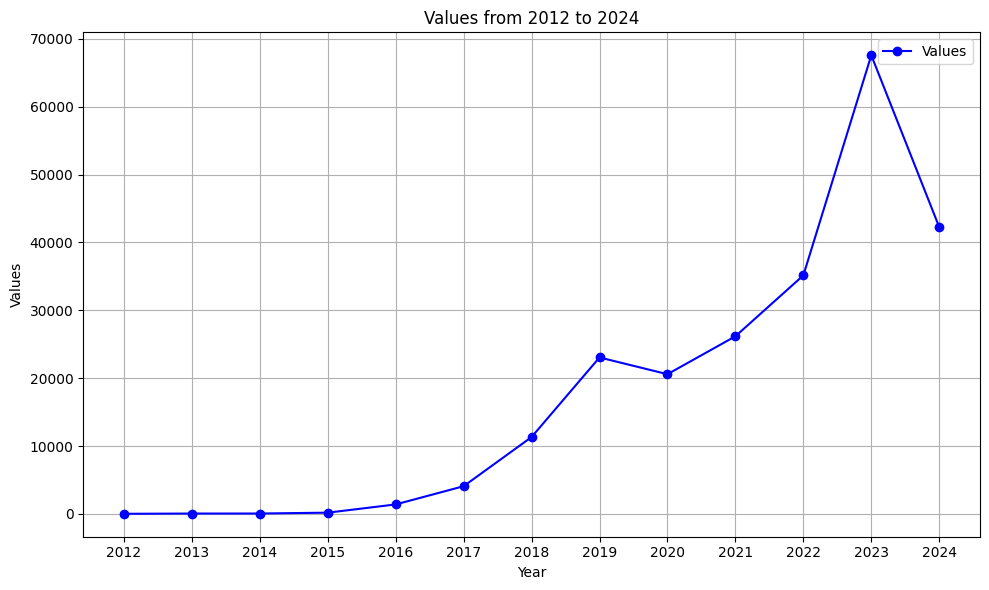

In [185]:
years = list(range(2012, 2025))  # Years from 2012 to 2024

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, filter, marker='o', linestyle='-', color='b', label='Values')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Values from 2012 to 2024')
plt.xticks(years)  # Show all years on x-axis
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()